# Figures and Axes

By convention, we import matplotlib as plt (note the specific import statement below).  We'll also use the magic command `%matplotlib inline` to make plots appear inside this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Let's load up some data to start plotting.  This dataset is provided by Jeffrey Wooldridge, and comes from a New York Times article (Dec 28, 1994).

In [5]:
Wine = pd.read_csv('wine.csv')
Wine.head()

,country,alcohol,deaths,heart,liver
0,Australia,2.5,785.0,211,15.300000
1,Austria,3.9,863.0,167,45.599998
2,Belg/Lux,2.9,883.0,131,20.700001
3,Canada,2.4,793.0,191,16.400000
4,Denmark,2.9,971.0,220,23.900000


Here's the codebook we're provided:

variable   | desc
-----------|---
country    |                   
alcohol    |                    liters alcohol from wine, per capita
deaths     |                    deaths per 100,000
heart      |                    heart disease dths per 100,000
liver      |                    liver disease dths per 100,000

It's important to know the different between Figures and Axes.  As you can see in the picture, a `Figure` is the outer container, which may contain one or more objects called `Axes`.

![axes](fig_axes.png)

You can create a `Figure` by itself as follows.  However, you won't see anything because initially the figure doesn't have any Axes.

In [38]:
plt.figure()

To make a plot, we first have to add subplots.

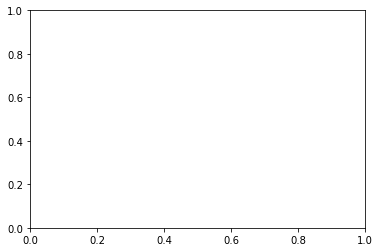

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

You can check that the subplot object has type `AxesSubplot`, which is a kind of `Axes` object.

In [40]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

The object is called an `Axes` because it contains an x-axis and a y-axis.  (That's why it awkwardly sounds like a plural noun, even though it's just one `Axes`)

The arguments to `add_subplot` represent the number of rows of subplots, the number of columns of subplots, and the one you want to create.  Here's an example for creating a 2 by 2 grid.

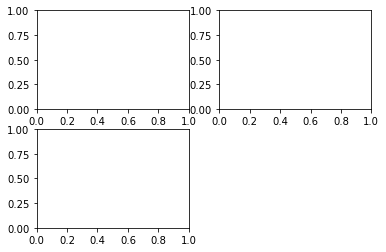

In [41]:
fig = plt.figure()
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)

To control the overall size of your `Figure`, use the `figsize` argument.

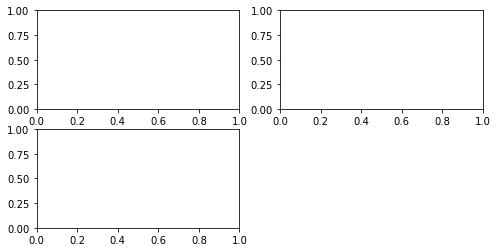

In [42]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)

If you plot with a command like `plt.plot(...)`, your graph appears in the last `Axes` you create.

(array([ 7.,  4.,  5.,  1.,  0.,  0.,  2.,  0.,  1.,  1.]),
 array([ 0.60000002,  1.45000006,  2.3000001 ,  3.15000013,  4.00000017,
         4.8500002 ,  5.70000024,  6.55000027,  7.40000031,  8.25000035,
         9.10000038]),
 <a list of 10 Patch objects>)

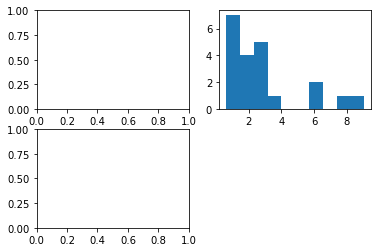

In [43]:
fig = plt.figure()
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)
plt.hist(Wine.alcohol)

Warning: Plots are reset after the end of a notebook cell, so you have to put all the commands for a plot in a single cell, even if it's a very complex figure with lots of subplots.

If you store a name for each `Axes`, you can then add plots using their instance methods.

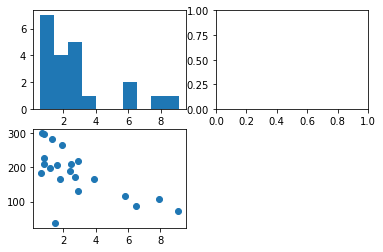

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,2)
ax1.hist(Wine.alcohol)
ax2.scatter(Wine.alcohol, Wine.heart)

For convenience, Matplotlib has a function to create a `Figure` and grid of `Axes` automatically.  That can make our code look a bit neater.

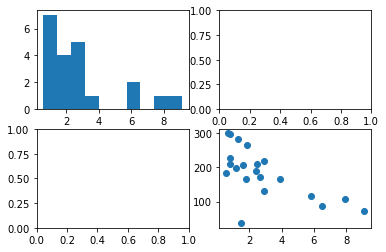

In [45]:
fig, ax = plt.subplots(2,2)
ax[0][0].hist(Wine.alcohol)
ax[1][1].scatter(Wine.alcohol, Wine.heart)

Two important arguments when you have multiple plots are `sharex` and `sharey`.  If you set these to `True`, Python will make sure the graphs use the same scale.  Otherwise, the range of each `Axis` will be scaled independently.  Here's an example where we want to compare the heart disease and liver disease are related to alcohol intake.  First, we'll try it without `sharex`.

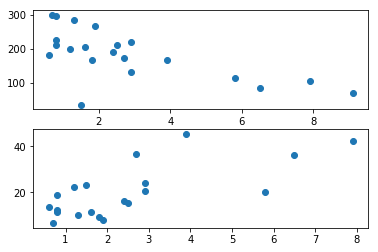

In [6]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Wine.alcohol, Wine.heart)
ax[1].scatter(Wine.alcohol, Wine.liver)

You can see that the x-axes don't line up.  (This is actually because I made sure there is a missing value in the data.)  We can correct this with `sharex`.

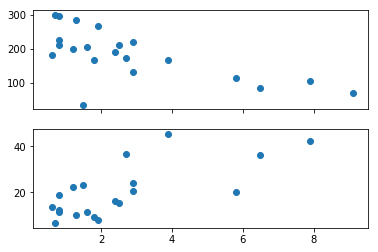

In [7]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(Wine.alcohol, Wine.heart)
ax[1].scatter(Wine.alcohol, Wine.liver)

Finally, we'll add titles to each `Axes` so we can tell them apart.  We'll also adjust the `figsize` and the spacing around the subplots. We can do this with the `subplots_adjust` method.

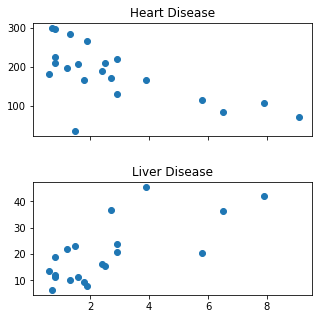

In [8]:
fig, ax = plt.subplots(2,1, sharex=True, figsize = (5,5))
fig.subplots_adjust(hspace=.4)
ax[0].scatter(Wine.alcohol, Wine.heart)
ax[1].scatter(Wine.alcohol, Wine.liver)
ax[0].set_title('Heart Disease')
ax[1].set_title('Liver Disease')

You can see the general trends pretty easily.  Heart disease appears to go down as you look to countries that drink more red wine, but liver disease appears to go up.

Keep in mind that correlation is not causation, but this is at least consistent with the notion that alcohol is good for your heart but bad for your liver.